# Broom Solution Fraud Transaction Detection
MSCA 31015 Data Science for Consulting

## I. EDA & Feature Engineering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/31015/Week 7/fraudTrain.csv', index_col=0, parse_dates=['trans_date_trans_time', 'dob'])
test = pd.read_csv('/content/gdrive/MyDrive/31015/Week 7/fraudTest.csv', index_col=0, parse_dates=['trans_date_trans_time', 'dob'])
df = pd.concat([train, test])
df.shape

(1852394, 22)

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time              

### i. numeric variables

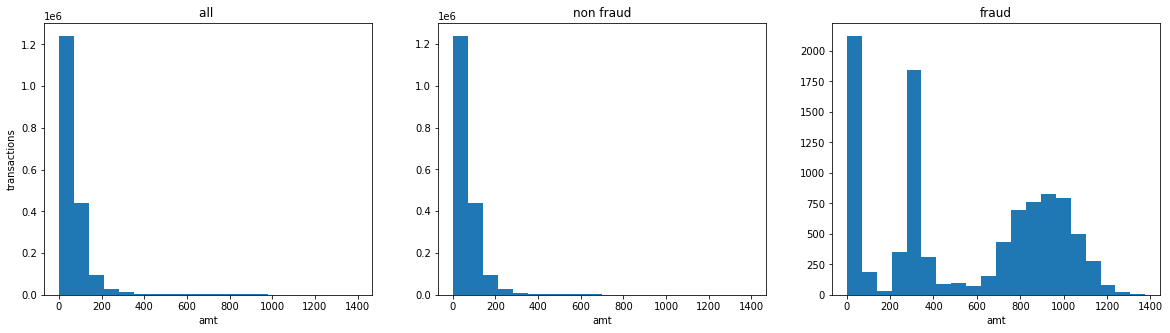

In [ ]:
# amt
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_ylabel('transactions')

ax[0].set_xlabel('amt')
ax[1].set_xlabel('amt')
ax[2].set_xlabel('amt')

ax[0].set_title('all ')
ax[1].set_title('non fraud')
ax[2].set_title('fraud')

ax[0].hist(df.loc[df['amt']<=1400, 'amt'], bins=20)
ax[1].hist(df.loc[(df['amt']<=1400) & (df['is_fraud']==0), 'amt'], bins=20)
ax[2].hist(df.loc[(df['amt']<=1400) & (df['is_fraud']==1), 'amt'], bins=20);

### ii. datetime variables

In [ ]:
# trans_date_trans_time
df['trans_date'] = df['trans_date_trans_time'].dt.date
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_ym'] = df['trans_date_trans_time'].dt.to_period('M')

In [ ]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_hour,trans_ym
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,0,2019-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,0,2019-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,0,2019-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,0,2019-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,0,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,2020-12-31,23,2020-12
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,2020-12-31,23,2020-12
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,2020-12-31,23,2020-12
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,2020-12-31,23,2020-12


In [ ]:
df['agg'] = 1
df['index'] = df['trans_date_trans_time']
df = df.set_index('index').sort_index()

# rolling: 60 day transaction amount average by card number
df_amt_60d = df.groupby('cc_num')['amt'].rolling('60D').mean().shift().reset_index().fillna(0)
df_amt_60d.columns = ['cc_num','trans_date','avg_amt_60d']
df_amt_60d['trans_date'] = df_amt_60d['trans_date'].dt.date
df_amt_60d = df_amt_60d.groupby(['cc_num','trans_date'])['avg_amt_60d'].min().reset_index()

# rolling: 60 day transactions by card number
df_60d = df.groupby('cc_num')['agg'].rolling('60D').count().shift().reset_index().fillna(0)
df_60d.columns = ['cc_num','trans_date','60d']
df_60d['trans_date'] = df_60d['trans_date'].dt.date
df_60d = df_60d.groupby(['cc_num','trans_date'])['60d'].min().reset_index()

# merge by cc_num, trans_date
df = df.merge(df_amt_60d, left_on = ['cc_num','trans_date'], right_on = ['cc_num','trans_date'], how = 'left')\
    .merge(df_60d, left_on = ['cc_num','trans_date'], right_on = ['cc_num','trans_date'], how = 'left')
df[['avg_amt_60d','60d']]= df[['avg_amt_60d','60d']].fillna(0)

In [ ]:
# age = trans_date_trans_time - dob
df['age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y'))

### iii. categorical variables

In [ ]:
# gender
(pd.crosstab(df['gender'], df['is_fraud'])/len(df)).sort_values(by=1)

is_fraud,0,1
gender,,
M,0.449631,0.002565
F,0.545159,0.002645


In [ ]:
# category
(pd.crosstab(df['category'], df['is_fraud'])/len(df)).sort_values(by=1)

is_fraud,0,1
category,,
travel,0.031203,0.000084
grocery_net,0.034929,0.000094
health_fitness,0.066059,0.000100
food_dining,0.070462,0.000111
home,0.094578,0.000143
personal_care,0.070069,0.000157
entertainment,0.072245,0.000158
kids_pets,0.087143,0.000164
misc_pos,0.061492,0.000174


In [ ]:
# one hot encoding
df = pd.concat([df, pd.get_dummies(df[['gender', 'category']], drop_first=True)], axis=1)

### iv. interactive visualizations

In [ ]:
# amt by city, age, gender
from ipywidgets import interact
import plotly.graph_objects as go

fig = go.FigureWidget()
scatt = fig.add_histogram()

@interact(state=df['state'].unique(), gender=df['gender'].unique(), age=(14,100,5), is_fraud=[0,1])

def update(state='NC',gender='M', age=14, is_fraud=1):
    with fig.batch_update():
        scatt=df[(df['state'] == state) & (df['gender'] == gender) & (df['age'] >= age) & (df['is_fraud'] == is_fraud)]['amt']
        fig.data[0].x=scatt

fig.update_layout(xaxis_title="Transactions", yaxis_title="Transaction Amount")
fig.show()

interactive(children=(Dropdown(description='state', options=('NC', 'WA', 'ID', 'MT', 'VA', 'PA', 'KS', 'TN', '…

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scattergeo(
        locationmode='USA-states',
        lon=df[df['is_fraud'] == 1]['long'],
        lat=df[df['is_fraud'] == 1]['lat'],
        marker=dict(color=df[df['is_fraud'] == 1]['is_fraud'], line_color='rgb(40,40,40)', line_width=0.5, sizemode='area'),
        name='test'))
fig.update_layout(geo=dict(landcolor='rgb(217,217,217)',), mapbox_style="open-street-map")

In [ ]:
import plotly.express as px 
fig = px.scatter_mapbox(df[df['is_fraud'] == 1], lat="lat", lon="long", hover_name="city",
                        zoom=3, height=500, color="is_fraud",  color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## II. Modeling

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
def model_results(model):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print('train:')
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print('test:')
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))
    y_pred_df = pd.DataFrame(y_test_pred, index=X_test.index)
    y_pred_a = pd.concat([X_test, y_pred_df,y_test], axis=1)
    a = y_pred_a.loc[(y_pred_a[0] != y_pred_a['is_fraud']) & y_pred_a['is_fraud'] == 1]
    a['amt'].plot(kind = 'hist', title= 'false positive amt distribution', bins = 20)
    return model

### i. correlation

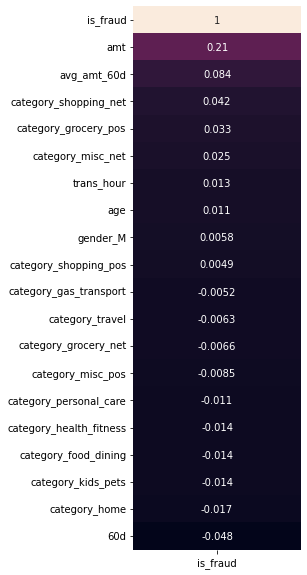

In [ ]:
cols = ['amt', 'trans_hour', 'avg_amt_60d', '60d', 'age', 'gender_M', 
        'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 
        'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 
        'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel']
import seaborn as sn
plt.figure(figsize=(3,10))
sn.heatmap(df[cols+['is_fraud']].corr()[['is_fraud']].sort_values(by='is_fraud', ascending=False), annot=True, cbar=False);

### ii. oversampling

In [ ]:
df['is_fraud'].value_counts(normalize=True)

0    0.99479
1    0.00521
Name: is_fraud, dtype: float64

In [ ]:
fraud_oversample = df[df['is_fraud'] == 1].sample(df[df['is_fraud'] == 0]['amt'].count(), replace=True)
df_oversampled = pd.concat([df[df['is_fraud'] == 0], fraud_oversample], axis=0)

###  iii. train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_oversampled[cols], df_oversampled['is_fraud'], train_size=2/3)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def model_results(model):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print('train:')
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print('test:')
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))
    return model

### iv. logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_results(LogisticRegression())

train:
[[1100233  128264]
 [ 262964  965529]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85   1228497
           1       0.88      0.79      0.83   1228493

    accuracy                           0.84   2456990
   macro avg       0.84      0.84      0.84   2456990
weighted avg       0.84      0.84      0.84   2456990

test:
[[550527  63719]
 [131401 482849]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85    614246
           1       0.88      0.79      0.83    614250

    accuracy                           0.84   1228496
   macro avg       0.85      0.84      0.84   1228496
weighted avg       0.85      0.84      0.84   1228496



LogisticRegression()

### v. decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = model_results(DecisionTreeClassifier(max_depth=3))

train:
[[1144924   83573]
 [ 202117 1026376]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89   1228497
           1       0.92      0.84      0.88   1228493

    accuracy                           0.88   2456990
   macro avg       0.89      0.88      0.88   2456990
weighted avg       0.89      0.88      0.88   2456990

test:
[[572134  42112]
 [100652 513598]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89    614246
           1       0.92      0.84      0.88    614250

    accuracy                           0.88   1228496
   macro avg       0.89      0.88      0.88   1228496
weighted avg       0.89      0.88      0.88   1228496



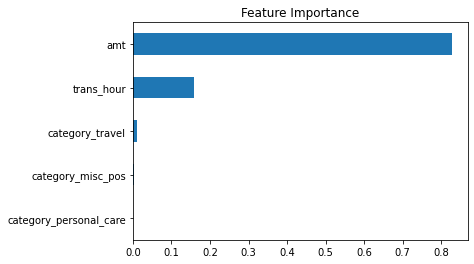

In [ ]:
pd.Series(dt.feature_importances_, index=X_train.columns).sort_values().tail().plot(kind='barh', title='Feature Importance');

train:
[[1145139   84111]
 [ 201938 1025802]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89   1229250
           1       0.92      0.84      0.88   1227740

    accuracy                           0.88   2456990
   macro avg       0.89      0.88      0.88   2456990
weighted avg       0.89      0.88      0.88   2456990

test:
[[571919  41574]
 [101367 513636]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89    613493
           1       0.93      0.84      0.88    615003

    accuracy                           0.88   1228496
   macro avg       0.89      0.88      0.88   1228496
weighted avg       0.89      0.88      0.88   1228496



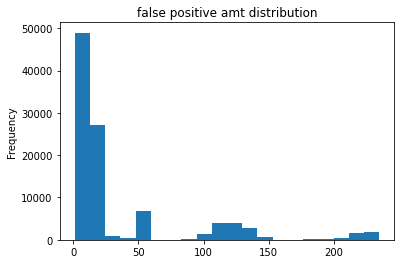

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = model_results(DecisionTreeClassifier(max_depth=3))

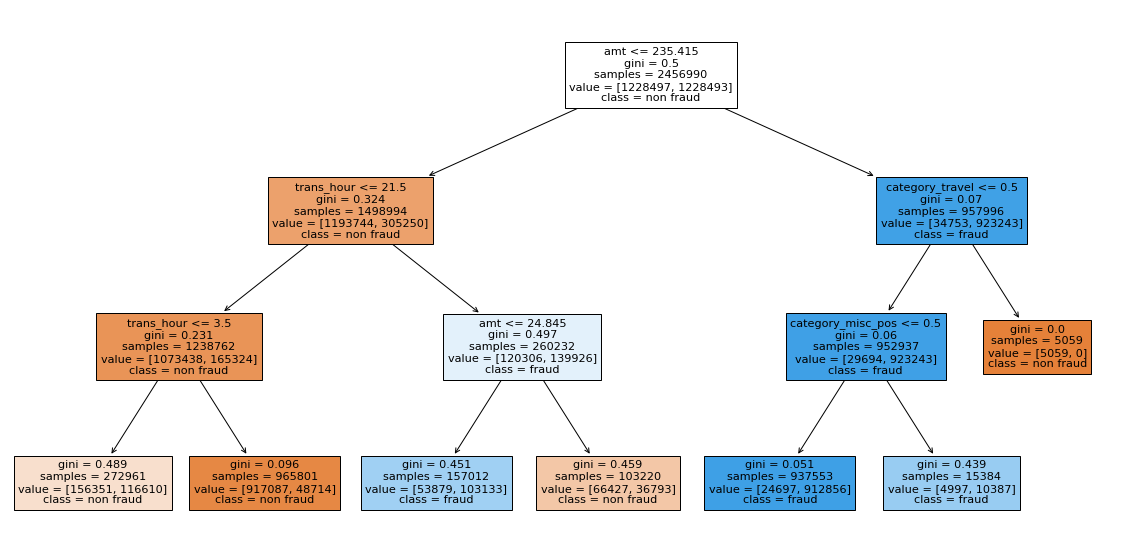

In [ ]:
plt.figure(figsize=(20, 10))
from sklearn import tree
tree.plot_tree(dt, max_depth=3, feature_names=cols, class_names=['non fraud', 'fraud'], filled=True);

### vi. random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_results(RandomForestClassifier(n_estimators=10, max_depth=3))

train:
[[1090030  138467]
 [ 181338 1047155]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87   1228497
           1       0.88      0.85      0.87   1228493

    accuracy                           0.87   2456990
   macro avg       0.87      0.87      0.87   2456990
weighted avg       0.87      0.87      0.87   2456990

test:
[[544795  69451]
 [ 90570 523680]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87    614246
           1       0.88      0.85      0.87    614250

    accuracy                           0.87   1228496
   macro avg       0.87      0.87      0.87   1228496
weighted avg       0.87      0.87      0.87   1228496



RandomForestClassifier(max_depth=3, n_estimators=10)

### vii. xgboost

train:
[[1189277   39973]
 [ 145053 1082687]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93   1229250
           1       0.96      0.88      0.92   1227740

    accuracy                           0.92   2456990
   macro avg       0.93      0.92      0.92   2456990
weighted avg       0.93      0.92      0.92   2456990

test:
[[593543  19950]
 [ 72904 542099]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93    613493
           1       0.96      0.88      0.92    615003

    accuracy                           0.92   1228496
   macro avg       0.93      0.92      0.92   1228496
weighted avg       0.93      0.92      0.92   1228496



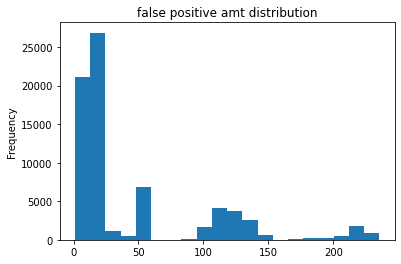

In [ ]:
from xgboost import XGBClassifier
xg = model_results(XGBClassifier(n_estimators=10, max_depth=3))

### vi. ROC Curve

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

y_scores = xg.predict_proba(X_train)
y_scores_rf = rf.predict_proba(X_train)
y_pred = xg.predict(X_train)

Random Forest: ROC AUC=0.956
XGBoost: ROC AUC=0.974


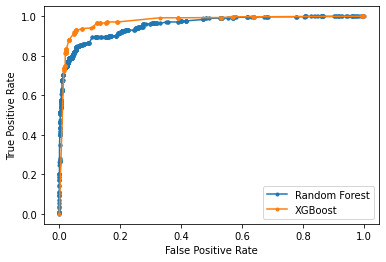

In [ ]:
# keep probabilities for the positive outcome only
y_pred_proba = y_scores[:, 1]
y_pred_proba_rf = y_scores_rf[:, 1]
# calculate scores
xg_auc = roc_auc_score(y_train, y_pred_proba)
rf_auc = roc_auc_score(y_train, y_pred_proba_rf)
# summarize scores
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
print('XGBoost: ROC AUC=%.3f' % (xg_auc))
# calculate roc curves
xb_fpr, xb_tpr, _ = roc_curve(y_train, y_pred_proba)
rf_fpr, rf_tpr, _ = roc_curve(y_train, y_pred_proba_rf)
# plot the roc curve for the model
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
pyplot.plot(xb_fpr, xb_tpr, marker='.', label='XGBoost')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

XGBoost: f1=0.921 auc=0.975


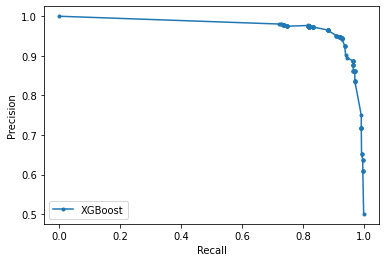

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

y_pred = xg.predict(X_train)

xg_precision, xg_recall, thresholds = precision_recall_curve(y_train, y_pred_proba)
xg_f1, xg_auc = f1_score(y_train, y_pred), auc(xg_recall, xg_precision)


# summarize scores
print('XGBoost: f1=%.3f auc=%.3f' % (xg_f1, xg_auc))
# plot the precision-recall curves
pyplot.plot(xg_recall, xg_precision, marker='.', label='XGBoost')

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

threshold for 0.975 precision: 0.6410951614379883


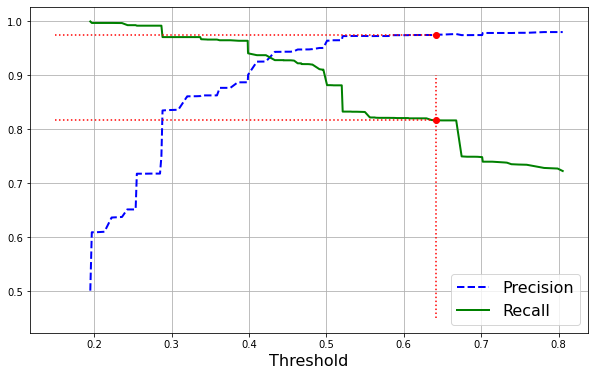

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True) 

#select recall where precision is greater than n
n = .975
recall_90_precision = xg_recall[np.argmax(xg_precision >= n)]
#select threshold
threshold_90_precision = thresholds[np.argmax(xg_precision >= n)]
print("threshold for {} precision: {}".format(n, threshold_90_precision))

plt.figure(figsize=(10, 6))                                                                  

plot_precision_recall_vs_threshold(xg_precision, xg_recall, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [.45, 0.9], "r:")               
plt.plot([.15, threshold_90_precision], [n, n], "r:")                                
plt.plot([.15, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [n], "ro")                                            
plt.plot([threshold_90_precision], [recall_90_precision], "ro") 
plt.show()
#https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb